In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import pickle as pkl

import matplotlib.pyplot as plt

## For the 'abortion' data set

In [2]:
# get the graphs from the 'abortion' data set

path = "../data/abortion_daily.csv"

edgelist = pd.read_csv(path, sep = ",", header = None, names = ["src", "dst", "time"])
edgelist['weight'] = 1
edgelist  = edgelist.drop(columns = 'time')
swap_cond = edgelist.src > edgelist.dst
edgelist.loc[swap_cond, ['src', 'dst']] = edgelist.loc[swap_cond, ['dst', 'src']].values
agg_edgelist = edgelist.groupby([edgelist['src'], edgelist['dst']], as_index = False).aggregate('sum')

# create the graph
graph = nx.from_pandas_edgelist(agg_edgelist, 'src', 'dst', edge_attr = True)

In [3]:
nodes_sizes = []
edges_sizes = []
for i in nx.connected_components(graph):
    g = graph.subgraph(i)
    nodes_sizes.append(len(g.nodes()))
    edges_sizes.append(len(g.edges()))

In [4]:
n = []
e = []
for i, j in sorted(zip(nodes_sizes, edges_sizes), reverse = True):
    n.append(i)
    e.append(j)

In [5]:
print("All nodes: {}".format(len(graph.nodes())))
print("All edges: {}".format(len(graph.edges())))
print("Largest connected component (nodes): {}".format(n[0]))
print("Largest connected component (edges): {}".format(e[0]))
print("Ratios: {}; {}".format(n[0] / len(graph.nodes()), e[0] / len(graph.edges())))
print("Total number of graphs: {}".format(len(n)))

All nodes: 507867
All edges: 1196433
Largest connected component (nodes): 316237
Largest connected component (edges): 1040760
Ratios: 0.622676803178785; 0.8698857353483229
Total number of graphs: 123096


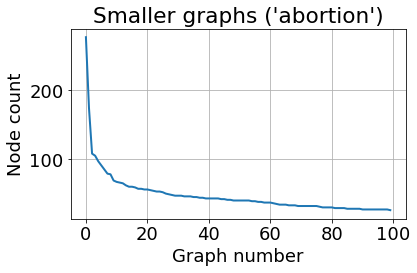

In [6]:
plt.figure(figsize = (6, 3.5))
plt.rcParams.update({'font.size': 18})
plt.plot(n[1:101], linewidth = 2)
plt.title("Smaller graphs ('abortion')")
plt.xlabel("Graph number")
plt.ylabel("Node count")
plt.grid()

plt.savefig("../plots/ad_hoc/_ab_smaller_graphs.png", bbox_inches = 'tight')

## For the 'guncontrol' data set

In [12]:
# get the graphs from the 'guncontrol' data set

path = "../data/guncontrol_daily.csv"

edgelist = pd.read_csv(path, sep = ",", header = None, names = ["src", "dst", "time"])
edgelist['weight'] = 1
edgelist  = edgelist.drop(columns = 'time')
swap_cond = edgelist.src > edgelist.dst
edgelist.loc[swap_cond, ['src', 'dst']] = edgelist.loc[swap_cond, ['dst', 'src']].values
agg_edgelist = edgelist.groupby([edgelist['src'], edgelist['dst']], as_index = False).aggregate('sum')

# create the graph
graph = nx.from_pandas_edgelist(agg_edgelist, 'src', 'dst', edge_attr = True)

In [13]:
nodes_sizes = []
edges_sizes = []
for i in nx.connected_components(graph):
    g = graph.subgraph(i)
    nodes_sizes.append(len(g.nodes()))
    edges_sizes.append(len(g.edges()))
    
n = []
e = []
for i, j in sorted(zip(nodes_sizes, edges_sizes), reverse = True):
    n.append(i)
    e.append(j)

In [14]:
print("All nodes: {}".format(len(graph.nodes())))
print("All edges: {}".format(len(graph.edges())))
print("Largest connected component (nodes): {}".format(n[0]))
print("Largest connected component (edges): {}".format(e[0]))
print("Ratios: {}; {}".format(n[0] / len(graph.nodes()), e[0] / len(graph.edges())))
print("Total number of graphs: {}".format(len(n)))

All nodes: 335721
All edges: 768242
Largest connected component (nodes): 236579
Largest connected component (edges): 686732
Ratios: 0.7046893104691098; 0.8939006198567638
Total number of graphs: 69649


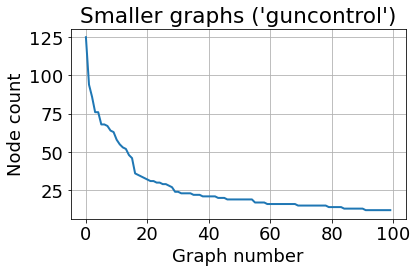

In [15]:
plt.figure(figsize = (6, 3.5))
plt.rcParams.update({'font.size': 18})
plt.plot(n[1:101], linewidth = 2)
plt.title("Smaller graphs ('guncontrol')")
plt.xlabel("Graph number")
plt.ylabel("Node count")
plt.grid()

plt.savefig("../plots/ad_hoc/_gc_smaller_graphs.png", bbox_inches = 'tight')

## For the 'healthcare' data set

In [16]:
# get the graphs from the 'healthcare' data set

path = "../data/obamacare_daily.csv"

edgelist = pd.read_csv(path, sep = ",", header = None, names = ["src", "dst", "time"])
edgelist['weight'] = 1
edgelist  = edgelist.drop(columns = 'time')
swap_cond = edgelist.src > edgelist.dst
edgelist.loc[swap_cond, ['src', 'dst']] = edgelist.loc[swap_cond, ['dst', 'src']].values
agg_edgelist = edgelist.groupby([edgelist['src'], edgelist['dst']], as_index = False).aggregate('sum')

# create the graph
graph = nx.from_pandas_edgelist(agg_edgelist, 'src', 'dst', edge_attr = True)

In [17]:
nodes_sizes = []
edges_sizes = []
for i in nx.connected_components(graph):
    g = graph.subgraph(i)
    nodes_sizes.append(len(g.nodes()))
    edges_sizes.append(len(g.edges()))
    
n = []
e = []
for i, j in sorted(zip(nodes_sizes, edges_sizes), reverse = True):
    n.append(i)
    e.append(j)

In [18]:
print("All nodes: {}".format(len(graph.nodes())))
print("All edges: {}".format(len(graph.edges())))
print("Largest connected component (nodes): {}".format(n[0]))
print("Largest connected component (edges): {}".format(e[0]))
print("Ratios: {}; {}".format(n[0] / len(graph.nodes()), e[0] / len(graph.edges())))
print("Total number of graphs: {}".format(len(n)))

All nodes: 221604
All edges: 713940
Largest connected component (nodes): 164423
Largest connected component (edges): 663732
Ratios: 0.7419676540134654; 0.9296747625850912
Total number of graphs: 43779


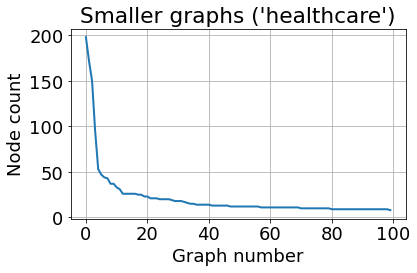

In [19]:
plt.figure(figsize = (6, 3.5))
plt.rcParams.update({'font.size': 18})
plt.plot(n[1:101], linewidth = 2)
plt.title("Smaller graphs ('healthcare')")
plt.xlabel("Graph number")
plt.ylabel("Node count")
plt.grid()

plt.savefig("../plots/ad_hoc/_hc_smaller_graphs.png", bbox_inches = 'tight')